## Observations and Insights

## Dependencies and starter code

#  Observations

### 1.) Ramicane seems to be the second most promising cancer treatment second to capomulin. 

### 2.) The Tumor volume seems to be relative to the weight of the mouse. The weight of the mouse is porportionate to the Volume of the Tumor. Meaning as the mouse increases in size or if the mouse is already a certain size the Tumor will also be of a volume in proportion to that weight.

### 3.) Each mouse was treated with chosen medication a total of (10) times.




In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
animaltestingdata = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
animaltestingdata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
animaltestingdata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
Cancerdrug_Tumormean_df = animaltestingdata.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
Cancerdrug_Tumormean_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [4]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen






Drug_Tumormean= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

Drug_Tumormedian= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

Drug_Tumorvar= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)" ]

Drug_Tumorsd= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

Drug_TumorSEM= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]



CancerDrug_TumorSummary_df=pd.DataFrame({ "Mean": Drug_Tumormean,  
                              "Median": Drug_Tumormedian,
                              "Variance":Drug_Tumorvar,
                               "SD":Drug_Tumorsd,
                               "SEM":Drug_TumorSEM})
CancerDrug_TumorSummary_df




# CancerDrug_TumorSummary_df.sortby


#Top4=CancerDrug_TumorSummary_df.sort_values("SEM", ascending=True)

#Top4












# Drug_TumorMean= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# Ramicane=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ramicane")]
# Infubinol=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Infubinol")]
# Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]
# Ceftamin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ceftamin")]
# InfubinolTumor=Infubinol.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# CapomulinTumor=Capomulin.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# CeftaminTumor=Ceftamin.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

#Cancerdrug = animaltestingdata.sort_values("Drug Regimen")
#Cancerdrug
# Cancerdrug_Tumor = pd.DataFrame({"Drug Regimen": Drug Regimen,
#                                     "Tumor": Tumor Volume(mm3)})
# Cancerdrug_Tumor
#animaltestingdata['Drug Regimen'].value_counts()
# animaltestingdata=animaltestingdata.rename(columns={"Tumor Volume(mm3)": "Tumor Volume"}, inplace=True)
# print (animaltestingdata)
# Cancer_Drugs= animaltestingdata.groupby(["Drug Regimen"]).mean()["Tumor Volume(mm3)"]
# Canger_Drugs

# grouped_cancerdrugs = animaltestingdata.groupby(["Drug Regimen"])
# print (grouped_cancerdrugs. head())
# # grouped_cancerdrugs = animaltestingdata.groupby(["Drug Regimen(Ramicane)"])
# # grouped_cancerdrugs                                  
# #mean_numpy = np.mean(temperatures)
# # mean_numpy

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

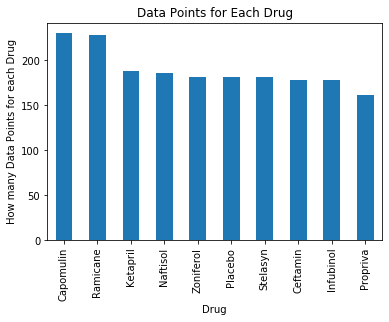

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

CancerDrug_TumorSummary_df=pd.DataFrame({ "Mean": Drug_Tumormean,  
                              "Median": Drug_Tumormedian,
                              "Variance":Drug_Tumorvar,
                               "SD":Drug_Tumorsd,
                               "SEM":Drug_TumorSEM})
CancerDrug_TumorSummary_df







Datapoints = animaltestingdata["Drug Regimen"].value_counts()
Datapoints.plot(kind = "bar")

plt.xticks()
plt.title("Data Points for Each Drug")
plt.xlabel("Drug")
plt.ylabel("How many Data Points for each Drug")
plt.show()







#x_axis = np.arange(len(Datapoints))
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
#tick_locations = [value for value in x_axis]
#Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
#plt.ylim(0, max(users)+5000)



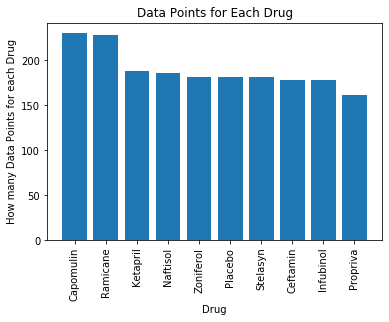

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

Datapoints = animaltestingdata["Drug Regimen"].value_counts()
#Datapoints.plot(kind = "bar")
plt.bar(Datapoints.index.values,Datapoints.values)
plt.xticks(rotation=90)
plt.title("Data Points for Each Drug")
plt.xlabel("Drug")
plt.ylabel("How many Data Points for each Drug")
plt.show()


plt.show()

## Pie plots

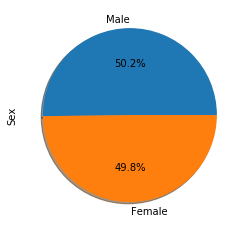

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#animaltestingdata


Quantityofm=mouse_metadata.Sex.value_counts()

Quantityofm.plot(kind="pie",autopct="%1.1f%%",shadow=True, startangle=0)
plt.show()

# # Labels for the sections of our pie chart
# labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# # The values of each section of the pie chart
# sizes = [220, 95, 80, 100]

# # The colors of each section of the pie chart
# colors = ["red", "lightskyblue", "lightcoral", "orange"]

# # Tells matplotlib to seperate the "Humans" section from the others
# explode = (0.1, 0, 0, 0)

# # Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=40)

# # Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")


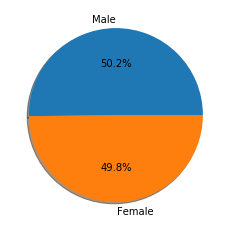

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Quantityofm=mouse_metadata.Sex.value_counts()

plt.pie(Quantityofm.values,labels=Quantityofm.index.values,autopct="%1.1f%%",shadow=True, startangle=0)
plt.show()


## Quartiles, outliers and boxplots

In [9]:
Top4=CancerDrug_TumorSummary_df.sort_values("SEM", ascending=True)
Top4

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
Ramicane=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ramicane")]
Ramicanefinal_tumor_vol=Ramicane[Ramicane['Timepoint']==45]
Ramicanefinal_tumor_vol



quartiles = Ramicanefinal_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor data is: {lowerq}")
print(f"The upper quartile of final tumor data is: {upperq}")
print(f"The interquartile range of final tumor data is: {iqr}")
print(f"The the median of final tumor data is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicaneoutlier_data = Ramicanefinal_tumor_vol.loc[(Ramicanefinal_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (Ramicanefinal_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
Ramicaneoutlier_data

The lower quartile of final tumor data is: 30.981175224999998
The upper quartile of final tumor data is: 38.508305307499995
The interquartile range of final tumor data is: 7.527130082499998
The the median of final tumor data is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


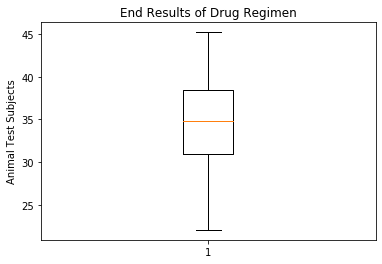

In [11]:

RamicaneBoxplot = Ramicanefinal_tumor_vol['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Results of Drug Regimen')
ax1.set_ylabel('Animal Test Subjects')
ax1.boxplot(RamicaneBoxplot)
plt.show()

In [12]:
Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]
#Capomulin.to_csv("Capomulin.csv")
Capomulinfinal_tumor_vol=Capomulin[Capomulin['Timepoint']==45]
Capomulinfinal_tumor_vol



quartiles = Capomulinfinal_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor data is: {lowerq}")
print(f"The upper quartile of final tumor data is: {upperq}")
print(f"The interquartile range of final tumor data is: {iqr}")
print(f"The the median of final tumor data is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulinoutlier_data = Capomulinfinal_tumor_vol.loc[(Capomulinfinal_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (Capomulinfinal_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
Capomulinoutlier_data

The lower quartile of final tumor data is: 32.37735684
The upper quartile of final tumor data is: 40.1592203
The interquartile range of final tumor data is: 7.781863460000004
The the median of final tumor data is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


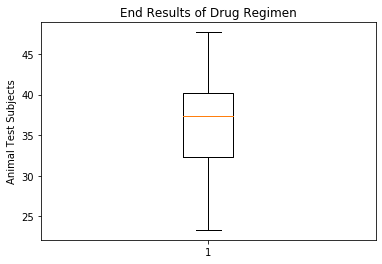

In [13]:
CapomulinBoxplot = Capomulinfinal_tumor_vol['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Results of Drug Regimen')
ax1.set_ylabel('Animal Test Subjects')
ax1.boxplot(CapomulinBoxplot)
plt.show()

In [14]:
Ceftamin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ceftamin")]
Ceftaminfinal_tumor_vol=Ceftamin[Ceftamin['Timepoint']==45]
Ceftaminfinal_tumor_vol



quartiles = Ceftaminfinal_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor data is: {lowerq}")
print(f"The upper quartile of final tumor data is: {upperq}")
print(f"The interquartile range of final tumor data is: {iqr}")
print(f"The the median of final tumor data is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftaminoutlier_data = Ceftaminfinal_tumor_vol.loc[(Ceftaminfinal_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (Ceftaminfinal_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
Ceftaminoutlier_data



The lower quartile of final tumor data is: 61.43389223
The upper quartile of final tumor data is: 67.52748237
The interquartile range of final tumor data is: 6.093590140000003
The the median of final tumor data is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


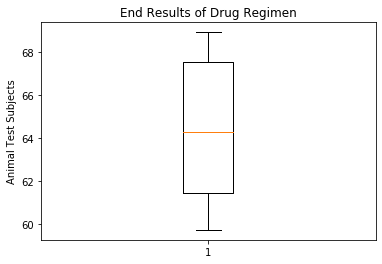

In [15]:
CeftaminBoxplot = Ceftaminfinal_tumor_vol['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Results of Drug Regimen')
ax1.set_ylabel('Animal Test Subjects')
ax1.boxplot(CeftaminBoxplot)
plt.show()

In [16]:
Infubinol=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Infubinol")]
Infubinolfinal_tumor_vol=Infubinol[Infubinol['Timepoint']==45]
Infubinolfinal_tumor_vol



quartiles = Infubinolfinal_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor data is: {lowerq}")
print(f"The upper quartile of final tumor data is: {upperq}")
print(f"The interquartile range of final tumor data is: {iqr}")
print(f"The the median of final tumor data is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinoloutlier_data = Infubinolfinal_tumor_vol.loc[(Infubinolfinal_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (Infubinolfinal_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
Infubinoloutlier_data


The lower quartile of final tumor data is: 62.75445141
The upper quartile of final tumor data is: 67.68556862
The interquartile range of final tumor data is: 4.9311172099999965
The the median of final tumor data is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


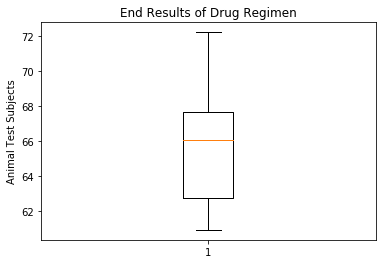

In [17]:
InfubinolBoxplot = Infubinolfinal_tumor_vol['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Results of Drug Regimen')
ax1.set_ylabel('Animal Test Subjects')
ax1.boxplot(InfubinolBoxplot)
plt.show()

In [18]:
#Lastnumbers=Capomulin.groupby(["Mouse ID"]).max()["Timepoint"]
#Lastnumbers=Capomulin.groupby(["Tumor Volume (mm3)","Mouse ID"]).max()["Timepoint"]
#Lastnumbers.head(10)
# CapomulinLastTumor=Lastnumbers["Tumor Volume (mm3)"]
# CapomulinLastTumor

#Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]
# Ceftamin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ceftamin")]
# Ramicane=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ramicane")]
#mouse_and_volume = animaltestingdata(["Tumor Volume (mm3)"].tail(1))
#Capomulin.head(50)
# CapomulinwithVolume=Capomulin["Tumor Volume (mm3)],["Mouse ID"]]
# CapomulinwithVolume

#MouseonCapomulin=Capomulin.groupby(["Mouse ID"])
#MouseonCapomulin

#Cancerdrug_Tumormean_df = animaltestingdata.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
#Cancerdrug_Tumormean_df


#Capomulinresults.pivot(columns='var', values='val')
# Drug_Tumorvar= Cancerdrug_Tumormean_df.groupby(["Mouse ID"]).var()["Tumor Volume (mm3)" ]
#LastMouseonCapomulin

# Infubinol=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Infubinol")]
# Ceftamin=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ceftamin")]

#Mouse = mouse_metadata.groupby(["Mouse ID"])
#TopDrugs=mouse_metadata[(mouse_metadata["Drug Regimen"]=="Ramicane,Infubinol,Capomulin,Ceftamin")]
# Infubinol=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Infubinol")]
# Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]
# Ceftamin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Ceftamin")]


#mouse_and_drug
#mouse_and_volume
# lastvolumevalue =mouse_and_drug.tail(1)(["Tumor Volume (mm3)"])
# lastvolumevalue
# fig1, ax1 = plt.subplots()
# ax1.set_title('Quartiles of Drug Treatment')
# ax1.set_ylabel('Tumor volumne After Treatment')
# ax1.boxplot(Mouse)
# plt.show()
#Mouse = animaltestingdata.groupby(["Mouse ID"])
#Mouse  =Mouse.reset_index()
#Mouse
# family_and_generosity_df = happiness_df.sort_values(
#     ["Family", "Generosity"], ascending=False)
# family_and_generosity_df.head()
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#CancerDrug_TumorSummary_df
#animaltestingdata
# CancerDrug_TumorSummary_df = CancerDrug_TumorSummary_df.sort_values("Variance", ascending=True)
# CancerDrug_TumorSummary_df
# iloc[:4]
# Mousetreatmentquartiles = animaltestingdata["Tumor Volume (mm3)"]
# Drug_Tumormedian= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
# Drug_Tumorvar= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)" ]
# Drug_Tumorsd= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
# Drug_TumorSEM= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# CancerDrug_TumorSummary_df=pd.DataFrame({ "Mean": Drug_Tumormean,  
#                               "Median": Drug_Tumormedian,
#                               "Variance":Drug_Tumorvar,
#                                "SD":Drug_Tumorsd,
#                                "SEM":Drug_TumorSEM})
# CancerDrug_TumorSummary_df

# Top4=CancerDrug_TumorSummary_df.sort_values("SEM", ascending=True)
# Top4
#mouse_and_drugdf.head(38)     
# Mice=mouse_and_drugdf
# top4=mouse_and_drugdf.iloc[:4]
# top4
# tumorvolume = mouse_and_drugdf['Tumor Volume (mm3)']
# Capomulin=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Capomulin")]
# Ramicane=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ramicane")]
# Infubinol=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Infubinol")]
# Ceftamin=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ceftamin")]
#LastTumorVolume=animaltestingdata.valu["Tumor Volume (mm3)"]].values
#tumorvolumes= animaltestingdata.groupby(["Mouse ID"])["Tumor Volume (mm3)"]
#School_summary_df.to_csv("new.csv")
# endTumorVolume= animaltestingdata.groupby(["Mouse ID"]).last()["Tumor Volume (mm3)"]
# endTumorVolume
#Tumor= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# TenthValue= Cancerdrug_Tumormean_df.groupby(["Mouse ID"]).iloc[:10]["Tumor Volume (mm3)"]
# Drug_Tumorvar= Cancerdrug_Tumormean_df.groupby(["Mouse ID"]).var()["Tumor Volume (mm3)" ]
# Drug_Tumorsd= Cancerdrug_Tumormean_df.groupby(["Mouse ID"]).std()["Tumor Volume (mm3)"]
# Drug_TumorSEM= Cancerdrug_Tumormean_df.groupby(["Mouse ID"]).sem()["Tumor Volume (mm3)"]
# iloc[:4]
# Top4=CancerDrug_TumorSummary_df.sort_values("SEM", ascending=True)
# Top4
#mouse_and_drugdf.head(38)     
# Mice=mouse_and_drugdf
# top4=mouse_and_drugdf.iloc[:4]
# top4
# tumorvolume = mouse_and_drugdf['Tumor Volume (mm3)']
# Capomulin=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Capomulin")]
# Ramicane=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ramicane")]
# Infubinol=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Infubinol")]
# Ceftamin=mouse_and_drugdf[(mouse_and_drugdf["Drug Regimen"]=="Ceftamin")]
#LastTumorVolume=animaltestingdata.valu["Tumor Volume (mm3)"]].values
#tumorvolumes= animaltestingdata.groupby(["Mouse ID"])["Tumor Volume (mm3)"]
#School_summary_df.to_csv("new.csv")
# endTumorVolume= animaltestingdata.groupby(["Mouse ID"]).last()["Tumor Volume (mm3)"]
# endTumorVolume
#Tumor= Cancerdrug_Tumormean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




## Line and scatter plots

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]

MouseonCapomulin=Capomulin.loc[Capomulin["Mouse ID"]=="s185"]
MouseonCapomulin


plt.xlabel("Time With MatPlotLib")
plt.ylabel("How Cool MatPlotLib Seems")



plt.plot(MouseonCapomulin["Timepoint"],MouseonCapomulin["Tumor Volume (mm3)"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

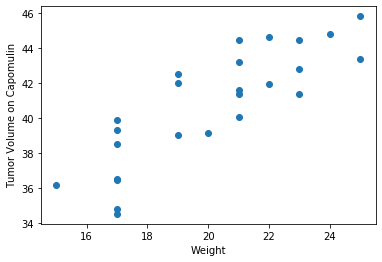

In [34]:

Capomulin=animaltestingdata[(animaltestingdata["Drug Regimen"]=="Capomulin")]

CapomulinWeightaverage=Capomulin.groupby(["Mouse ID"]).mean()


#MouseonCapomulin=Capomulin.loc[Capomulin["Mouse ID"]=="s185"]


plt.scatter(CapomulinWeightaverage['Weight (g)'],CapomulinWeightaverage["Tumor Volume (mm3)"])


plt.xlabel("Weight")
plt.ylabel("Tumor Volume on Capomulin")




plt.show()



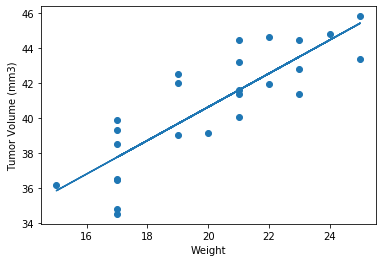

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


CoCapomulin=round(st.pearsonr(CapomulinWeightaverage['Weight (g)'],CapomulinWeightaverage["Tumor Volume (mm3)"])[0],2) 

ModelCapomulin=st.linregress(CapomulinWeightaverage['Weight (g)'],CapomulinWeightaverage["Tumor Volume (mm3)"])

yValues=CapomulinWeightaverage["Weight (g)"]* ModelCapomulin[0]+ ModelCapomulin[1]
plt.scatter(CapomulinWeightaverage['Weight (g)'],CapomulinWeightaverage["Tumor Volume (mm3)"])
plt.plot(CapomulinWeightaverage['Weight (g)'], yValues)


plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')



plt.show()
                                
# x_values = data['bp']
# y_values = data['1Y_Disease_Progress']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue}")
# plt.show()






